In [155]:
import pandas as pd
import numpy as np

#### Load dataset and present in a user-friendly way

In [156]:
# Loading of dataset
df = pd.read_csv('data.csv')

In [157]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [158]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,12000.000000,11931.000000,11970.000000,11994.000000,12000.000000,12000.000000,12000.000000,1.200000e+04
mean,2010.366417,249.212304,5.626149,3.433967,26.652583,19.731667,1562.599750,4.047974e+04
std,7.610080,108.942442,1.776181,0.882499,8.843787,8.958944,1444.032657,5.992542e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099500e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.217625e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [159]:
#shape of the dataset
df.shape

(12000, 16)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               12000 non-null  object 
 1   Model              12000 non-null  object 
 2   Year               12000 non-null  int64  
 3   Engine Fuel Type   11997 non-null  object 
 4   Engine HP          11931 non-null  float64
 5   Engine Cylinders   11970 non-null  float64
 6   Transmission Type  12000 non-null  object 
 7   Driven_Wheels      12000 non-null  object 
 8   Number of Doors    11994 non-null  float64
 9   Market Category    8258 non-null   object 
 10  Vehicle Size       12000 non-null  object 
 11  Vehicle Style      12000 non-null  object 
 12  highway MPG        12000 non-null  int64  
 13  city mpg           12000 non-null  int64  
 14  Popularity         12000 non-null  int64  
 15  MSRP               12000 non-null  int64  
dtypes: float64(3), int64(5

#### Missing value and Null value handling

In [161]:
# checking for missing values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [162]:
df.drop('Market Category', inplace=True, axis=1)

In [163]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [164]:
df.dropna(subset=['Engine Fuel Type', 'Engine Cylinders', 'Number of Doors'], inplace=True)

In [165]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            63
Engine Cylinders      0
Transmission Type     0
Driven_Wheels         0
Number of Doors       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [166]:
from sklearn.impute import KNNImputer

In [167]:
numerical_columns = [i for i in df.columns if df[i].dtype != 'object']
numerical_columns

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [168]:
imputer = KNNImputer(n_neighbors=2)

In [169]:
X = df[numerical_columns]
X = imputer.fit_transform(X)

In [170]:
X = pd.DataFrame(X, columns=numerical_columns)

In [171]:
X.isnull().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

In [172]:
X

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011.0,335.0,6.0,2.0,26.0,19.0,3916.0,46135.0
1,2011.0,300.0,6.0,2.0,28.0,19.0,3916.0,40650.0
2,2011.0,300.0,6.0,2.0,28.0,20.0,3916.0,36350.0
3,2011.0,230.0,6.0,2.0,28.0,18.0,3916.0,29450.0
4,2011.0,230.0,6.0,2.0,28.0,18.0,3916.0,34500.0
...,...,...,...,...,...,...,...,...
11956,2017.0,184.0,4.0,4.0,36.0,23.0,1013.0,22490.0
11957,2017.0,184.0,4.0,4.0,36.0,23.0,1013.0,25690.0
11958,2017.0,295.0,6.0,4.0,28.0,18.0,1013.0,30900.0
11959,2017.0,184.0,4.0,4.0,36.0,23.0,1013.0,27795.0


#### Data Duplication Handling

In [173]:
X.duplicated().sum()

1022

In [174]:
# Checking and deleting duplicate values
if X.duplicated().sum() > 0:    
    # getting the indexes of the duplicate values
    droplist=X.loc[X.duplicated()==True].index.tolist()
    # Deleting the duplicate values
    X.drop(droplist,axis=0,inplace=True)

In [175]:
X

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011.0,335.0,6.0,2.0,26.0,19.0,3916.0,46135.0
1,2011.0,300.0,6.0,2.0,28.0,19.0,3916.0,40650.0
2,2011.0,300.0,6.0,2.0,28.0,20.0,3916.0,36350.0
3,2011.0,230.0,6.0,2.0,28.0,18.0,3916.0,29450.0
4,2011.0,230.0,6.0,2.0,28.0,18.0,3916.0,34500.0
...,...,...,...,...,...,...,...,...
11870,2012.0,300.0,6.0,4.0,23.0,16.0,204.0,46120.0
11871,2012.0,300.0,6.0,4.0,23.0,16.0,204.0,56670.0
11872,2012.0,300.0,6.0,4.0,23.0,16.0,204.0,50620.0
11873,2013.0,300.0,6.0,4.0,23.0,16.0,204.0,50920.0


#### Measure of central tendency and dispersion

In [176]:
X.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,10939.000000,10939.000000,10939.000000,10939.000000,10939.000000,10939.000000,10939.000000,1.093900e+04
mean,2010.843222,253.937151,5.658378,3.453149,26.601700,19.677941,1560.886187,4.227010e+04
std,7.086889,109.911858,1.793111,0.873867,8.578899,8.558642,1450.273537,6.195370e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.184500e+04
50%,2015.000000,240.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,3.077000e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.324000e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [177]:
X.mean()

Year                 2010.843222
Engine HP             253.937151
Engine Cylinders        5.658378
Number of Doors         3.453149
highway MPG            26.601700
city mpg               19.677941
Popularity           1560.886187
MSRP                42270.097084
dtype: float64

In [178]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

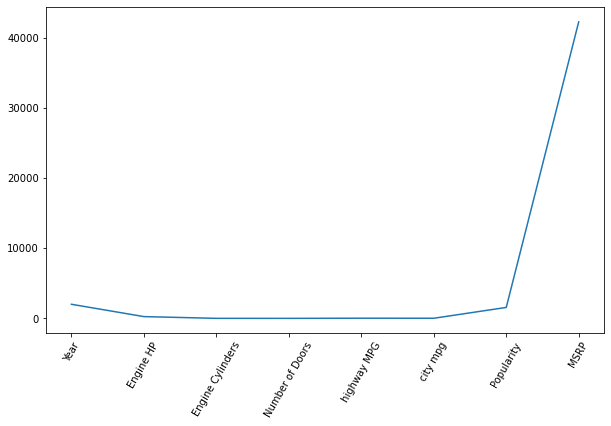

In [179]:
plt.plot(X.columns, X.mean())
plt.xticks(rotation=60)

In [180]:
X.median()

Year                 2015.0
Engine HP             240.0
Engine Cylinders        6.0
Number of Doors         4.0
highway MPG            26.0
city mpg               18.0
Popularity           1385.0
MSRP                30770.0
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

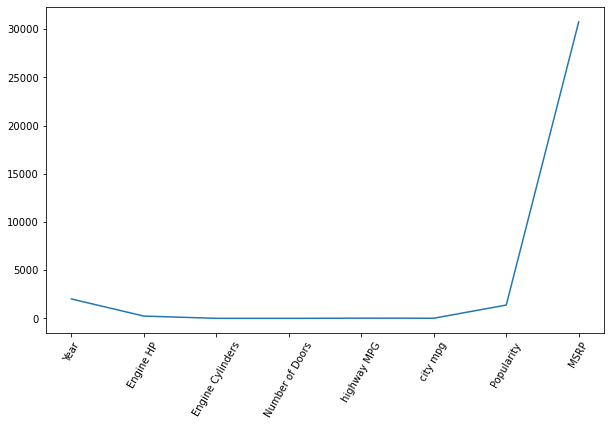

In [181]:
plt.plot(X.columns, X.median())
plt.xticks(rotation=60)

In [182]:
X.mode()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2015.0,200.0,4.0,4.0,24.0,17.0,1385.0,2000.0


In [183]:
X.std()

Year                    7.086889
Engine HP             109.911858
Engine Cylinders        1.793111
Number of Doors         0.873867
highway MPG             8.578899
city mpg                8.558642
Popularity           1450.273537
MSRP                61953.697844
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

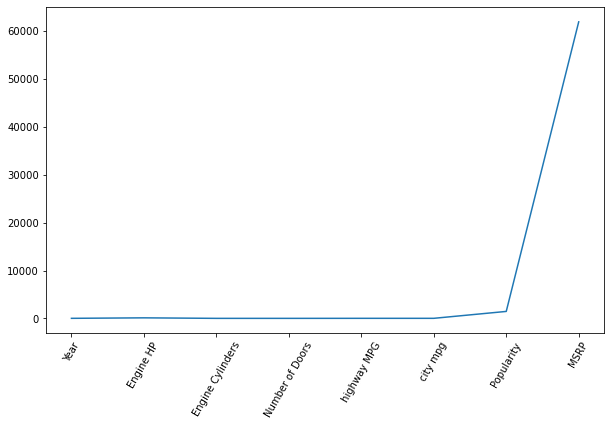

In [184]:
plt.plot(X.columns, X.std())
plt.xticks(rotation=60)

In [185]:
X.var()

Year                5.022400e+01
Engine HP           1.208062e+04
Engine Cylinders    3.215246e+00
Number of Doors     7.636441e-01
highway MPG         7.359751e+01
city mpg            7.325036e+01
Popularity          2.103293e+06
MSRP                3.838261e+09
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

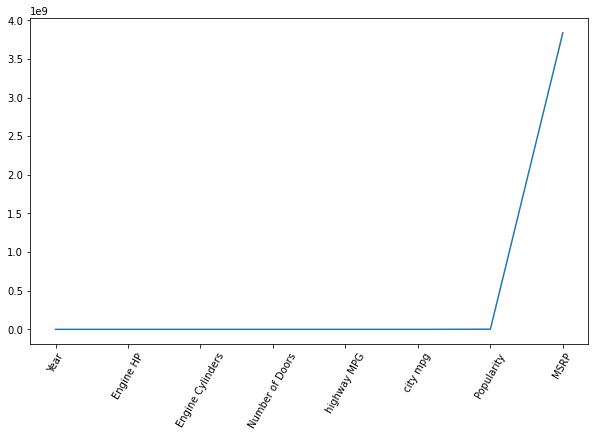

In [186]:
plt.plot(X.columns, X.var())
plt.xticks(rotation=60)

#### Outlier detection and graphical presentation (graph from data)

Year


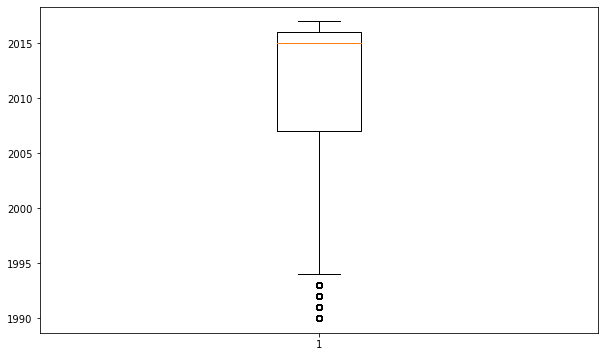

Engine HP


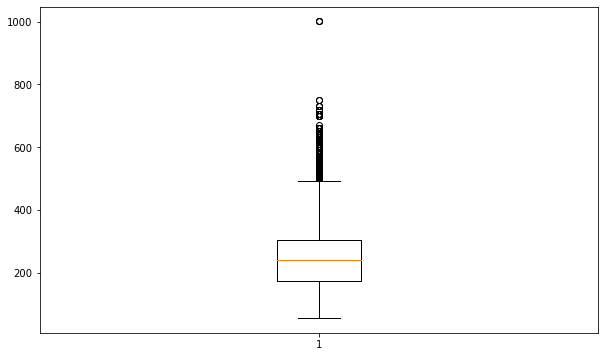

Engine Cylinders


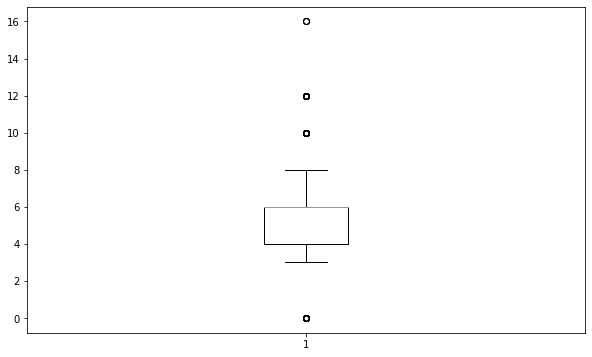

Number of Doors


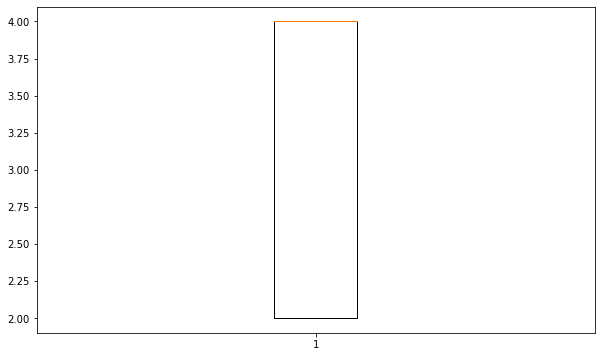

highway MPG


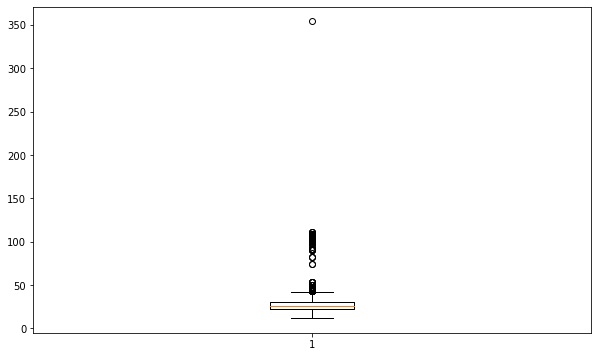

city mpg


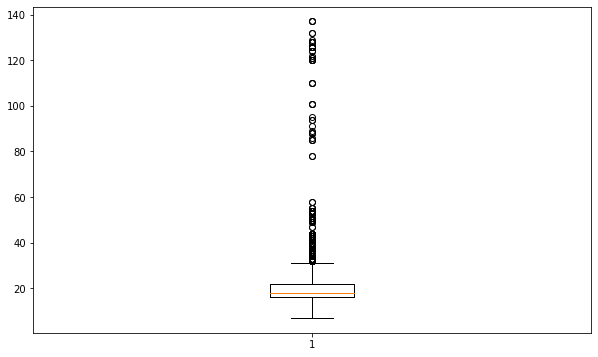

Popularity


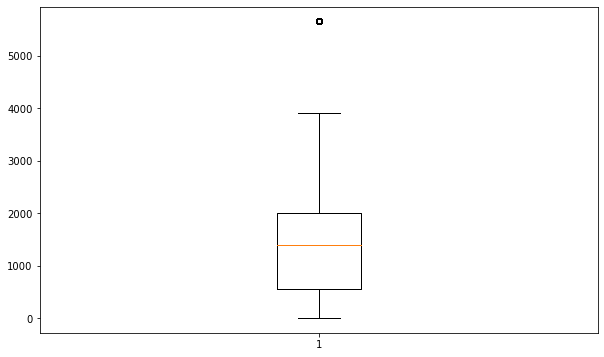

MSRP


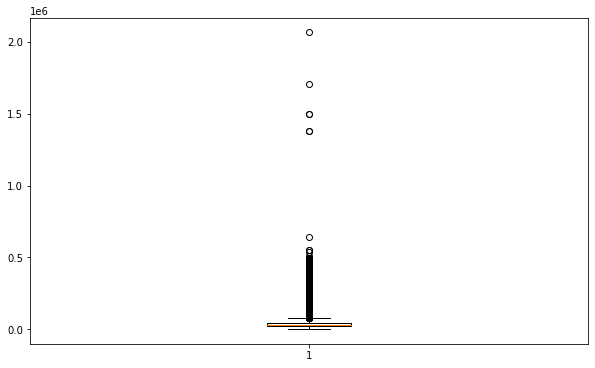

In [187]:
for i in X.columns:
    print(i)
    plt.boxplot(X[i])
    plt.show()

In [188]:
# Removing Outliers
def remove_outliers(dataset):
    temp_dataset = dataset.copy()
    all_columns = temp_dataset.columns
    for ea_columns in all_columns:
        Q1 = temp_dataset[ea_columns].quantile(0.25)
        Q3 = temp_dataset[ea_columns].quantile(0.75)
        IQR = Q3 - Q1
        boundary = [Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)]
        temp_dataset = temp_dataset[(temp_dataset[ea_columns] > boundary[0]) & (temp_dataset[ea_columns] < boundary[1])]
    return temp_dataset

In [189]:
print("data shape before outlier removal:", X.shape)
temp_df = remove_outliers(X)
print("data shape after outlier removal:", temp_df.shape)

data shape before outlier removal: (10939, 8)
data shape after outlier removal: (8332, 8)
